In [98]:
import pandas as pd
import numpy as np

In [99]:
train_df = pd.read_csv('train.csv')

In [100]:
train_df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [101]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
Employee ID             22750 non-null object
Date of Joining         22750 non-null object
Gender                  22750 non-null object
Company Type            22750 non-null object
WFH Setup Available     22750 non-null object
Designation             22750 non-null float64
Resource Allocation     21369 non-null float64
Mental Fatigue Score    20633 non-null float64
Burn Rate               21626 non-null float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [102]:
train_df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [103]:
train_df.rename(columns = {'Date of Joining' : 'Date_of_Joining','Company Type':'Company_Type','WFH Setup Available':'WFH_Setup_Available','Resource Allocation':'Resource_Allocation','Mental Fatigue Score':'Mental_Fatigue_Score'}, inplace = True)

In [104]:
train_df['Joining_day']=pd.to_datetime(train_df.Date_of_Joining,format="%Y-%m-%d").dt.day
train_df['Joining_month']=pd.to_datetime(train_df.Date_of_Joining,format="%Y-%m-%d").dt.month
#train_df['Joining_year']=pd.to_datetime(train_df.Date_of_Joining,format="%Y-%m-%d").dt.year

In [105]:
train_df.head()

,Employee ID,Date_of_Joining,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn Rate,Joining_day,Joining_month
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,30,9
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,30,11
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49,10,3
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20,3,11
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,24,7


In [106]:
train_df.drop(['Date_of_Joining'],axis=1,inplace=True)

In [107]:
train_df['Gender'].value_counts()

Female    11908
Male      10842
Name: Gender, dtype: int64

In [108]:
Gender = train_df[['Gender']]
Gender = pd.get_dummies(Gender)
Gender

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
22745,1,0
22746,1,0
22747,0,1
22748,1,0


In [109]:
train_df['Company_Type'].value_counts()

Service    14833
Product     7917
Name: Company_Type, dtype: int64

In [110]:
Company_Type = train_df[['Company_Type']]
Company_Type = pd.get_dummies(Company_Type)
Company_Type

,Company_Type_Product,Company_Type_Service
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
22745,0,1
22746,1,0
22747,0,1
22748,0,1


In [111]:
train_df['WFH_Setup_Available'].value_counts()

Yes    12290
No     10460
Name: WFH_Setup_Available, dtype: int64

In [112]:
WFH_Setup_Available = train_df[['WFH_Setup_Available']]
WFH_Setup_Available = pd.get_dummies(WFH_Setup_Available)
WFH_Setup_Available

,WFH_Setup_Available_No,WFH_Setup_Available_Yes
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
22745,1,0
22746,0,1
22747,0,1
22748,1,0


In [113]:
train_df.drop(['Gender','Company_Type','WFH_Setup_Available'],axis=1,inplace=True)

In [114]:
train_df=pd.concat([train_df,Gender,Company_Type,WFH_Setup_Available],axis=1)

In [115]:
train_df

,Employee ID,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn Rate,Joining_day,Joining_month,Gender_Female,Gender_Male,Company_Type_Product,Company_Type_Service,WFH_Setup_Available_No,WFH_Setup_Available_Yes
0,fffe32003000360033003200,2.0,3.0,3.8,0.16,30,9,1,0,0,1,1,0
1,fffe3700360033003500,1.0,2.0,5.0,0.36,30,11,0,1,0,1,0,1
2,fffe31003300320037003900,2.0,NaN,5.8,0.49,10,3,1,0,1,0,0,1
3,fffe32003400380032003900,1.0,1.0,2.6,0.20,3,11,0,1,0,1,0,1
4,fffe31003900340031003600,3.0,7.0,6.9,0.52,24,7,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,1.0,3.0,NaN,0.41,30,12,1,0,0,1,1,0
22746,fffe33003000350031003800,3.0,6.0,6.7,0.59,19,1,1,0,1,0,0,1
22747,fffe390032003000,3.0,7.0,NaN,0.72,5,11,0,1,0,1,0,1
22748,fffe33003300320036003900,2.0,5.0,5.9,0.52,10,1,1,0,0,1,1,0


In [116]:
train_df.isnull().sum()

Employee ID                   0
Designation                   0
Resource_Allocation        1381
Mental_Fatigue_Score       2117
Burn Rate                  1124
Joining_day                   0
Joining_month                 0
Gender_Female                 0
Gender_Male                   0
Company_Type_Product          0
Company_Type_Service          0
WFH_Setup_Available_No        0
WFH_Setup_Available_Yes       0
dtype: int64

In [117]:
train_df['Resource_Allocation'].fillna(np.mean(train_df['Resource_Allocation']),inplace=True)

In [118]:
train_df['Mental_Fatigue_Score'].fillna(np.mean(train_df['Mental_Fatigue_Score']),inplace=True)

In [119]:
train_df['Burn Rate'].fillna(np.mean(train_df['Burn Rate']),inplace=True)

In [120]:
train_df.head()

,Employee ID,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn Rate,Joining_day,Joining_month,Gender_Female,Gender_Male,Company_Type_Product,Company_Type_Service,WFH_Setup_Available_No,WFH_Setup_Available_Yes
0,fffe32003000360033003200,2.0,3.000000,3.8,0.16,30,9,1,0,0,1,1,0
1,fffe3700360033003500,1.0,2.000000,5.0,0.36,30,11,0,1,0,1,0,1
2,fffe31003300320037003900,2.0,4.481398,5.8,0.49,10,3,1,0,1,0,0,1
3,fffe32003400380032003900,1.0,1.000000,2.6,0.20,3,11,0,1,0,1,0,1
4,fffe31003900340031003600,3.0,7.000000,6.9,0.52,24,7,1,0,0,1,1,0


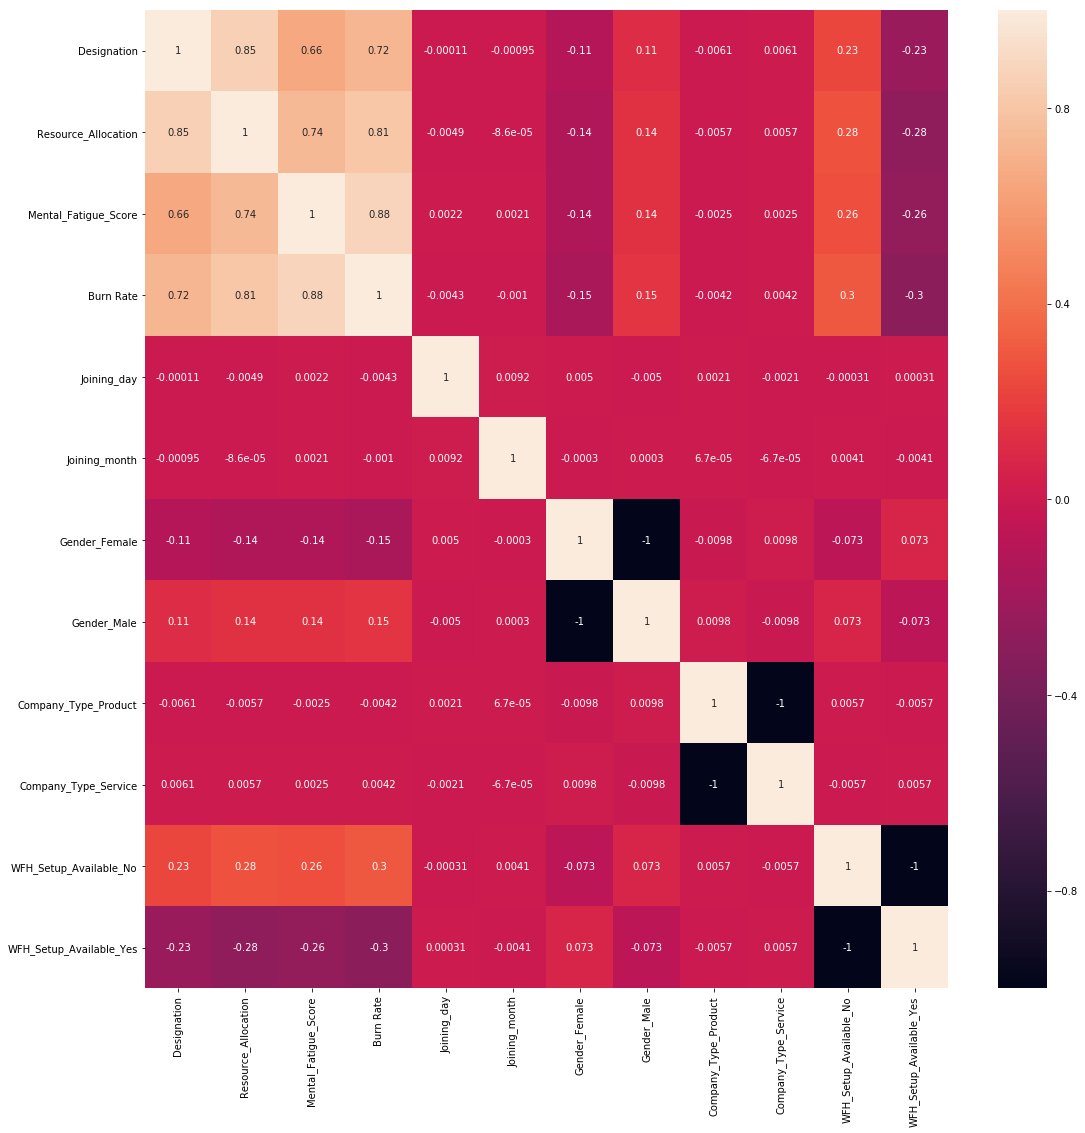

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (18,18))
sns.heatmap(train_df.corr(), annot = True)
plt.show()

In [122]:
train_df.columns

Index(['Employee ID', 'Designation', 'Resource_Allocation',
       'Mental_Fatigue_Score', 'Burn Rate', 'Joining_day', 'Joining_month',
       'Gender_Female', 'Gender_Male', 'Company_Type_Product',
       'Company_Type_Service', 'WFH_Setup_Available_No',
       'WFH_Setup_Available_Yes'],
      dtype='object')

In [123]:
X = train_df[['Designation', 'Resource_Allocation',
       'Mental_Fatigue_Score', 'Joining_day', 'Joining_month',
       'Gender_Female', 'Gender_Male', 'Company_Type_Product',
       'Company_Type_Service', 'WFH_Setup_Available_No',
       'WFH_Setup_Available_Yes']]

In [124]:
X

,Designation,Resource_Allocation,Mental_Fatigue_Score,Joining_day,Joining_month,Gender_Female,Gender_Male,Company_Type_Product,Company_Type_Service,WFH_Setup_Available_No,WFH_Setup_Available_Yes
0,2.0,3.000000,3.800000,30,9,1,0,0,1,1,0
1,1.0,2.000000,5.000000,30,11,0,1,0,1,0,1
2,2.0,4.481398,5.800000,10,3,1,0,1,0,0,1
3,1.0,1.000000,2.600000,3,11,0,1,0,1,0,1
4,3.0,7.000000,6.900000,24,7,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
22745,1.0,3.000000,5.728188,30,12,1,0,0,1,1,0
22746,3.0,6.000000,6.700000,19,1,1,0,1,0,0,1
22747,3.0,7.000000,5.728188,5,11,0,1,0,1,0,1
22748,2.0,5.000000,5.900000,10,1,1,0,0,1,1,0


In [125]:
y = train_df['Burn Rate']

In [126]:
y

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [128]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators = 100,random_state = 0)
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [129]:
y_pred = rfc.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_pred,y_test))
print(np.sqrt(mean_squared_error(y_pred,y_test)))
print(rfc.score(X_train,y_train))
print(rfc.score(X_test,y_test))

0.8245266017242715
0.075151011537801
0.9777142613493326
0.8472137112027858


In [116]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [117]:
y_pred = xgb.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_pred,y_test))
print(np.sqrt(mean_squared_error(y_pred,y_test)))
print(rfc.score(X_train,y_train))
print(rfc.score(X_test,y_test))

0.8279868755480095
0.0739183577418282
0.9779786746202797
0.8439300128200717


In [118]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [119]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_pred,y_test))
print(np.sqrt(mean_squared_error(y_pred,y_test)))
print(rfc.score(X_train,y_train))
print(rfc.score(X_test,y_test))

0.8005377955890995
0.07811273200318983
0.9779786746202797
0.8439300128200717


In [120]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [121]:
y_pred = dtr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_pred,y_test))
print(np.sqrt(mean_squared_error(y_pred,y_test)))
print(rfc.score(X_train,y_train))
print(rfc.score(X_test,y_test))

0.7169862553578882
0.10259834950214107
0.9779786746202797
0.8439300128200717


In [122]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [123]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [124]:
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [125]:
rfc_random.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  11.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  5.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=5, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [126]:
y_pred = rfc_random.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_pred,y_test))
print(np.sqrt(mean_squared_error(y_pred,y_test)))
print(rfc.score(X_train,y_train))
print(rfc.score(X_test,y_test))

0.8406895685217992
0.07086339002353167
0.9779786746202797
0.8439300128200717


In [133]:
import pickle
# open a file, where you ant to store the data
file = open('employee_burnout_rf.pkl', 'wb')


# dump information to that file
pickle.dump(rfc, file)

In [134]:
model = open('employee_burnout_rf.pkl','rb')
employee_b = pickle.load(model)

In [135]:
test_df = pd.read_csv('test.csv')

In [136]:
test_df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4
...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,2008-10-02,Female,Service,Yes,1.0,2.0,6.1
12246,fffe32003600330034003000,2008-03-31,Female,Product,Yes,2.0,4.0,5.9
12247,fffe31003800340039003000,2008-02-12,Male,Service,No,4.0,7.0,9.6
12248,fffe32003600380031003800,2008-02-06,Male,Service,No,3.0,6.0,6.7


In [137]:
test_df.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [138]:
test_df.rename(columns = {'Date of Joining' : 'Date_of_Joining'}, inplace = True)

In [150]:
test_df['Joining_day']=pd.to_datetime(test_df.Date_of_Joining,format="%Y-%m-%d").dt.day
test_df['Joining_month']=pd.to_datetime(test_df.Date_of_Joining,format="%Y-%m-%d").dt.month
#train_df['Joining_year']=pd.to_datetime(train_df.Date_of_Joining,format="%Y-%m-%d").dt.year

In [151]:
test_df.drop(['Date_of_Joining'],axis=1,inplace=True)

In [152]:
Gender = test_df[['Gender']]
Gender = pd.get_dummies(Gender)
Gender

Company_Type = test_df[['Company Type']]
Company_Type = pd.get_dummies(Company_Type)
Company_Type

WFH_Setup_Available = test_df[['WFH Setup Available']]
WFH_Setup_Available = pd.get_dummies(WFH_Setup_Available)
WFH_Setup_Available

test_df.drop(['Gender','Company Type','WFH Setup Available'],axis=1,inplace=True)
test_df=pd.concat([test_df,Gender,Company_Type,WFH_Setup_Available],axis=1)

In [153]:
test_df.columns

Index(['Employee ID', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Joining_day', 'Joining_month', 'Gender_Female',
       'Gender_Male', 'Company Type_Product', 'Company Type_Service',
       'WFH Setup Available_No', 'WFH Setup Available_Yes'],
      dtype='object')

In [154]:
test_ac = test_df[['Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Joining_day', 'Joining_month', 'Gender_Female',
       'Gender_Male', 'Company Type_Product', 'Company Type_Service',
       'WFH Setup Available_No', 'WFH Setup Available_Yes']]

In [155]:
prediction = employee_b.predict(test_ac)

In [156]:
prediction=np.round(prediction,2)

In [157]:
prediction

array([0.6 , 0.35, 0.44, ..., 0.82, 0.57, 0.14])